<a href="https://colab.research.google.com/github/Giffy/Mobility_AIBCN/blob/master/3_Dataset_creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset creation

Creation of mobile phone density images of Barcelona

In [0]:
import pandas as pd
import seaborn
import seaborn as sns

##  Download data

In [0]:
# Download previously cleaned data from 'Github'
!pip install wget
import wget
url = 'https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/coverageCatv4.tar.gz'
try:
  filename = wget.download(url)
  print ( 'Dataset downloaded successfully.')

  # Extract tar file
  import tarfile
  tf = tarfile.open( filename )
  tf.extractall()
  
except:
  print ( 'Error downloading dataset.')


Dataset downloaded successfully.


##  Load data

In [0]:
# load data
df = pd.read_csv('coverageCat.csv')
df.head(3)

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year
0,UNKNOWN,17,1,41.385,2.20,10,6,2015
1,IN_VEHICLE,17,1,41.385,2.14,10,6,2015
2,IN_VEHICLE,17,2,41.385,2.14,10,6,2015


In [0]:
df.tail(3)

,Activitat,Day,Hour,Latitude,Longitude,Month,Weekday,Year
2959753,IN_VEHICLE,4,8,41.46,2.03,5,4,2017
2959754,IN_VEHICLE,19,8,41.46,2.03,10,3,2016
2959755,IN_VEHICLE,19,8,41.46,2.03,10,3,2016


##  Data cleansing

In [0]:
df = df[df['Activitat']=='IN_VEHICLE']                                    # Keeps in dataFrame the data with activity "IN VEHICLE"

weekdays = [1,2,3,4,5]
df = df[(df['Weekday'].isin(weekdays))]                                   # Keeps in dataFrame the data from Monday to Friday

##  Generate dataset graphics
Using seaborn to generate graphics of mobile phone density

![Density_sample](https://raw.githubusercontent.com/Giffy/Mobility_AIBCN/master/dataset/plt_sample.png)



In [0]:
sns_plot.set(xlim=(41.459, 41.335),              
          ylim=( 2.030, 2.259 ),
          xticks=[0,2.5,5], 
          yticks=[0,2.5,5])

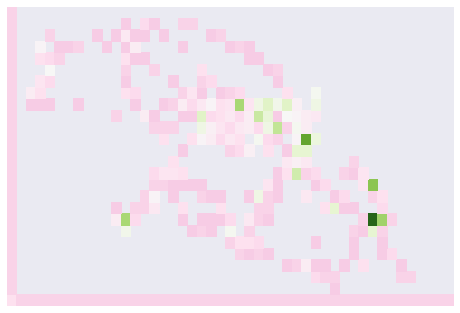

In [0]:
# Sample of plotting graphic with seaborn

df0 = df[ (df['Year']== 2015) & (df['Month']== 4) & (df['Day']== 3)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           
result = df0.pivot (index='Latitude' , columns='Longitude', values='Day')


sns_plot = seaborn.heatmap(result, 
                           cbar= False,                            # Removes color bar with scale 
                           xticklabels=False,                      # Removes X-axis labels
                           yticklabels=False,                      # Removes Y-axis labels
                           cmap="PiYG",                            # 2 contrasting colors
                           center=10
                          ) 

sns_plot.set_xlabel('')                                            # Removes X-axis title
sns_plot.set_ylabel('')                                            # Removes Y-axis title

fig = sns_plot.get_figure()                                        # Generates the heatmap image
#fig.savefig("output.png")                                         # Saves the image as png

In [0]:
!mkdir /content/Images
path = '/content/Images/'                                                # Path to store the heatmap images generated

# List of years, months, days and weekdays
years = [2015, 2016, 2017]
months = [1,2,3]#,4,5,6,7,8,9,10,11,12]
days = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]


def generate_images ( hours ):
  
  count = 0
  df0 = df[(df['Hour'].isin(hours))]                                      # Creates a dataset within the time range selected
  for year in years:                                                      # Iteration to collect the data per each picture
    df1 = df0[(df0['Year']== year)]                                       # Selects a year from list
    for month in months:
      df2 = df1[(df1['Month']== month)]                                   # Selects a month from list
      print ("Progress: " + str(year) + '_' + str(month))
      for day in days:
        df3 = df2[(df2['Day']== day)]                                     # Selects a day from list
        df4 = df3.groupby(['Latitude','Longitude'], as_index= False).count()
        result = df4.pivot (index='Latitude' , columns='Longitude', values='Day')

        try:                                                              # Try to catch the error when seaborn crashes, when result is empty (weekends, some days for months shorter than 31 days)
          sns_plot = seaborn.heatmap(result, 
                                     cbar= False,                         # Removes color bar with scale 
                                     xticklabels=False,                   # Removes X-axis labels
                                     yticklabels=False,                   # Removes Y-axis labels
                                     cmap="PiYG",                         # 2 contrasting colors
                                     center=10
                                    ) 
          sns_plot.set_xlabel('')                                         # Removes X-axis title
          sns_plot.set_ylabel('')                                         # Removes Y-axis title
          fig = sns_plot.get_figure()                                     # Plots the heatmap image

          # Filename creation
          period = 'AM' if 8 in hours else 'PM'
          filename = str(year) + '_' + str(month) + '_' + str(day) + '_' + period + '.png' 

          fig.savefig( path + filename )                                  # Saves image as png
          sns_plot = None
          count +=1
        except:
          pass
  print ( "Created " + str(count) + " images")

mkdir: cannot create directory ‘/content/Images’: File exists


Progress: 2015_1
Progress: 2015_2
Progress: 2015_3
Progress: 2016_1
Progress: 2016_2
Progress: 2016_3
Progress: 2017_1
Progress: 2017_2
Progress: 2017_3
Created 267 images


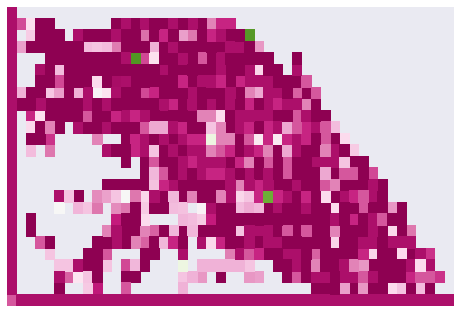

In [0]:
manana = [7,8,9]
generate_images ( manana )

Progress: 2015_1
Progress: 2015_2
Progress: 2015_3
Progress: 2016_1
Progress: 2016_2
Progress: 2016_3
Progress: 2017_1
Progress: 2017_2
Progress: 2017_3
Created 264 images


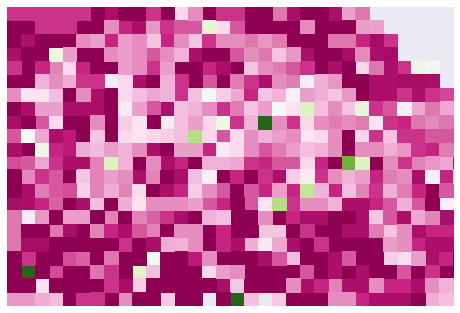

In [0]:
tarde = [17,18,19]
generate_images ( tarde )

## Copy dataset to Google Drive

In [0]:
from google.colab import drive
drive.mount('/gdrive')                                                   # Mounts Google Drive as a folder in google Colab

Mounted at /gdrive


In [0]:
!tar -czvf images.tar.gz Images
!mv images.tar.gz /gdrive/My\ Drive/

Images/
Images/2017_8_23_AM.png
Images/2016_1_3_AM.png
Images/2017_7_6_AM.png
Images/2015_5_7_AM.png
Images/2016_7_19_AM.png
Images/2017_9_22_PM.png
Images/2017_1_29_AM.png
Images/2015_7_29_AM.png
Images/2017_11_8_AM.png
Images/2015_7_1_AM.png
Images/2017_11_21_PM.png
Images/2016_10_6_PM.png
Images/2016_9_5_AM.png
Images/2016_4_25_PM.png
Images/2017_7_3_AM.png
Images/2015_4_6_PM.png
Images/2016_4_12_AM.png
Images/2016_2_26_PM.png
Images/2017_4_21_AM.png
Images/2016_8_10_PM.png
Images/2017_10_10_PM.png
Images/2015_11_27_PM.png
Images/2016_6_1_PM.png
Images/2015_3_1_PM.png
Images/2015_10_19_PM.png
Images/2017_8_25_AM.png
Images/2015_4_6_AM.png
Images/2016_12_19_AM.png
Images/2015_3_24_PM.png
Images/2017_5_22_PM.png
Images/2017_6_20_PM.png
Images/2017_10_18_PM.png
Images/2016_4_22_AM.png
Images/2015_6_17_AM.png
Images/2015_3_30_PM.png
Images/2016_12_5_AM.png
Images/2015_5_18_PM.png
Images/2015_6_12_PM.png
Images/2015_7_1_PM.png
Images/2016_12_9_AM.png
Images/2017_7_13_AM.png
Images/2015_9

In [0]:
!cp *.png /gdrive/My\ Drive/Images

In [0]:
!rm Images/*.png

In [0]:
!ls Images

## Plotting data sample with Folium

In [0]:
!pip install folium geopandas             # Install folium for map visualization

import folium                             # Library to create the map
from folium import plugins                # plugin to create a heatmap

    100% |████████████████████████████████| 901kB 6.1MB/s 
    100% |████████████████████████████████| 1.5MB 8.0MB/s 
    100% |████████████████████████████████| 17.9MB 1.6MB/s 
    100% |████████████████████████████████| 2.8MB 12.3MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
  Running setup.py bdist_wheel for munch ... - done
  Stored in directory: /root/.cache/pip/wheels/db/bf/bc/06a3e1bfe0ab27d2e720ceb3cff3159398d92644c0cec2c125
Successfully built pyproj munch


In [0]:
df0 = df[ (df['Year']== 2015) & (df['Month']== 2) & (df['Day']== 6)]
df0 = df0.groupby(['Latitude','Longitude'], as_index= False).count()           

latitude = df0.loc [ : , 'Latitude']
longitude = df0.loc [ : , 'Longitude']
total = df0.loc [ : , 'Day']

In [0]:
center_lat = 41.42
center_lon = 2.18

locationmap = folium.Map(location=[ center_lat , center_lon ], zoom_start=12, width=800, height=600 )
locationmap.add_child(plugins.HeatMap(zip(latitude, longitude, total), radius = 12))

locationmap